<a href="https://colab.research.google.com/github/Muhammad-Lutfi-2002/ENCRYPTIX/blob/main/CREDIT_CARD_FRAUD__DETECTION_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries dan Load Data

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score
from sklearn.metrics import recall_score, f1_score, matthews_corrcoef, confusion_matrix
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

# Load data
data = pd.read_csv("creditcard.csv")
print("Dataset Shape:", data.shape)
data.head()

Dataset Shape: (55551, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


#Data Analysis and Visualization


Transaction Distribution:
Fraud Transactions: 156 (0.28%)
Valid Transactions: 55394 (99.72%)


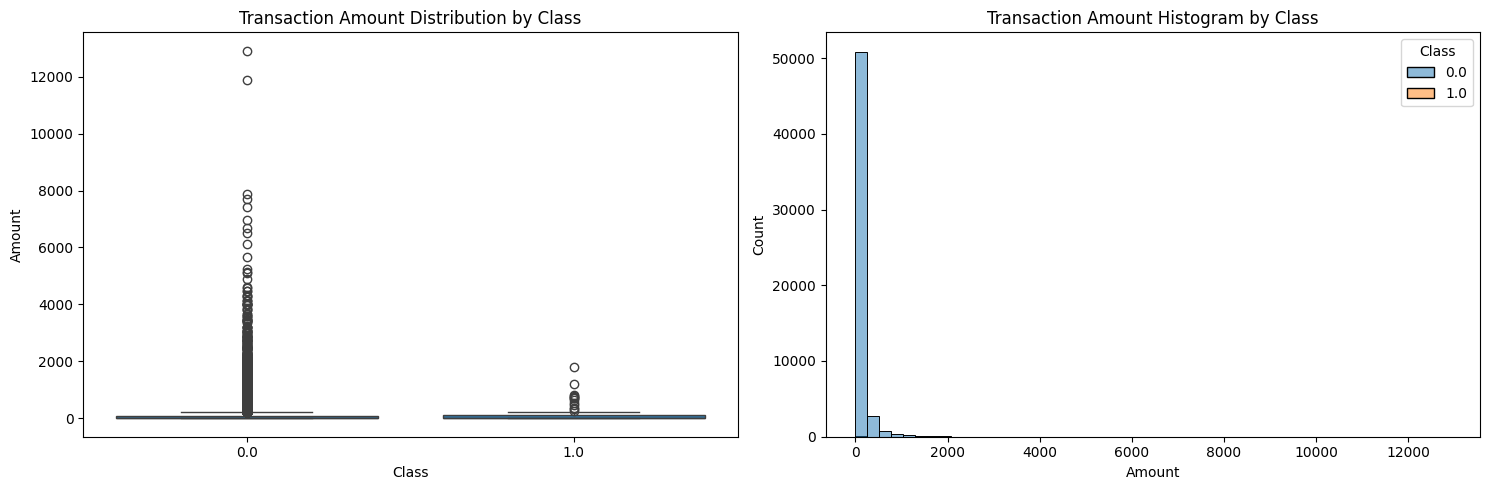

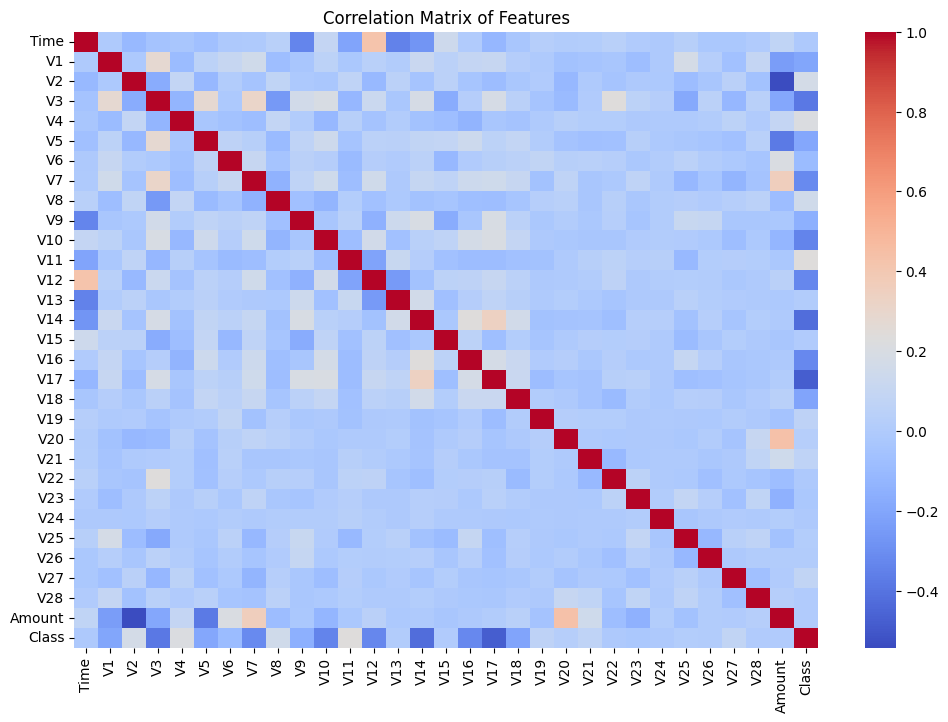

In [15]:
# Data analysis
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

print("\nTransaction Distribution:")
print(f"Fraud Transactions: {len(fraud)} ({(len(fraud)/len(data))*100:.2f}%)")
print(f"Valid Transactions: {len(valid)} ({(len(valid)/len(data))*100:.2f}%)")

# Transaction amount visualization
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Class', y='Amount', data=data)
plt.title('Transaction Amount Distribution by Class')

plt.subplot(1, 2, 2)
sns.histplot(data=data, x='Amount', hue='Class', bins=50)
plt.title('Transaction Amount Histogram by Class')

plt.tight_layout()
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Features')
plt.show()

# Preprocessing Data

In [19]:
# Separate features and target
X = data.drop(['Class', 'Time'], axis=1)  # Removing Time column
y = data['Class']

# Check for missing values
print("\nMissing values in features:")
print(X.isnull().sum())
print("\nMissing values in target:")
print(y.isnull().sum())

# Handle missing values
X = X.fillna(X.mean())  # Fill missing values with mean for features
y = y.fillna(0)  # Fill missing values with 0 for target

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

print("\nShape after SMOTE balancing:")
print("X shape:", X_balanced.shape)
print("y shape:", y_balanced.shape)

# Verify no missing values remain
print("\nMissing values after preprocessing:")
print("Features:", X_balanced.isnull().sum().sum())
print("Target:", y_balanced.isnull().sum())


Missing values in features:
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
dtype: int64

Missing values in target:
1

Shape after SMOTE balancing:
X shape: (110790, 29)
y shape: (110790,)

Missing values after preprocessing:
Features: 0
Target: 0


In [20]:
# Separate features and target
X = data.drop(['Class', 'Time'], axis=1)  # Removing Time column
y = data['Class']

# Check for missing values
print("\nMissing values before cleaning:")
print("Features:", X.isnull().sum().sum())
print("Target:", y.isnull().sum())

# Remove rows with missing values
data_clean = data.dropna()
X = data_clean.drop(['Class', 'Time'], axis=1)
y = data_clean['Class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

print("\nShape after SMOTE balancing:")
print("X shape:", X_balanced.shape)
print("y shape:", y_balanced.shape)

# Verify no missing values remain
print("\nMissing values after preprocessing:")
print("Features:", X_balanced.isnull().sum().sum())
print("Target:", y_balanced.isnull().sum())


Missing values before cleaning:
Features: 15
Target: 1

Shape after SMOTE balancing:
X shape: (110788, 29)
y shape: (110788,)

Missing values after preprocessing:
Features: 0
Target: 0


# Model Training dan Evaluasi - Random Forest

Random Forest Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Matthews Correlation Coefficient: 1.0000


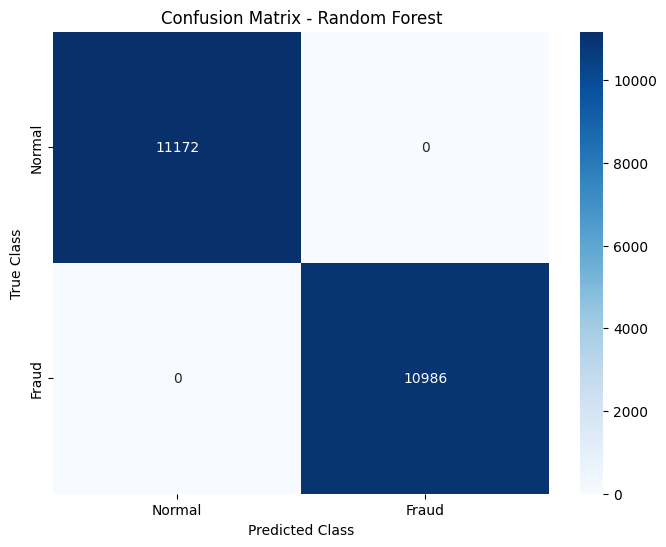

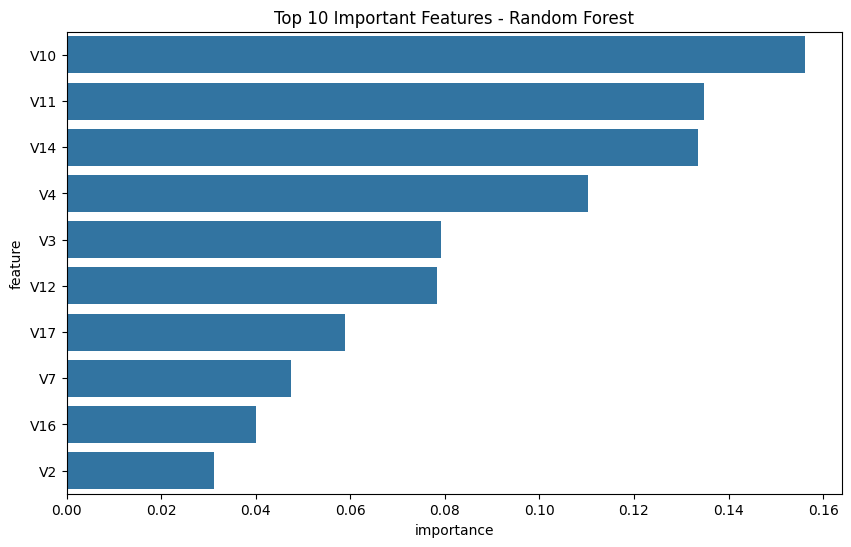

In [21]:
# Split data for Random Forest
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced,
                                                    test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)

# Evaluate Random Forest
print("Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, rf_pred):.4f}")
print(f"Matthews Correlation Coefficient: {matthews_corrcoef(y_test, rf_pred):.4f}")

# Random Forest Confusion Matrix
plt.figure(figsize=(8, 6))
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Normal', 'Fraud'],
           yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X_balanced.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance.head(10), x='importance', y='feature')
plt.title('Top 10 Important Features - Random Forest')
plt.show()

# Model Training and Evaluation - Gradient Boosting

Gradient Boosting Performance:
Accuracy: 0.9978
Precision: 0.9976
Recall: 0.9980
F1-Score: 0.9978
Matthews Correlation Coefficient: 0.9957


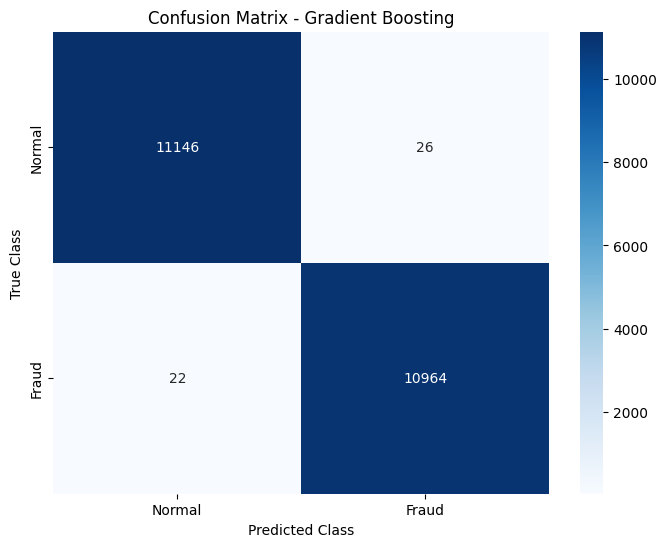

In [22]:
# Train Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
gb_pred = gb_model.predict(X_test)

# Evaluate Gradient Boosting
print("Gradient Boosting Performance:")
print(f"Accuracy: {accuracy_score(y_test, gb_pred):.4f}")
print(f"Precision: {precision_score(y_test, gb_pred):.4f}")
print(f"Recall: {recall_score(y_test, gb_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, gb_pred):.4f}")
print(f"Matthews Correlation Coefficient: {matthews_corrcoef(y_test, gb_pred):.4f}")

# Gradient Boosting Confusion Matrix
plt.figure(figsize=(8, 6))
gb_conf_matrix = confusion_matrix(y_test, gb_pred)
sns.heatmap(gb_conf_matrix, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Normal', 'Fraud'],
           yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix - Gradient Boosting')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

# Model Training and Evaluation - Logistic Regression

Logistic Regression Performance:
Accuracy: 0.9768
Precision: 0.9868
Recall: 0.9661
F1-Score: 0.9764
Matthews Correlation Coefficient: 0.9538


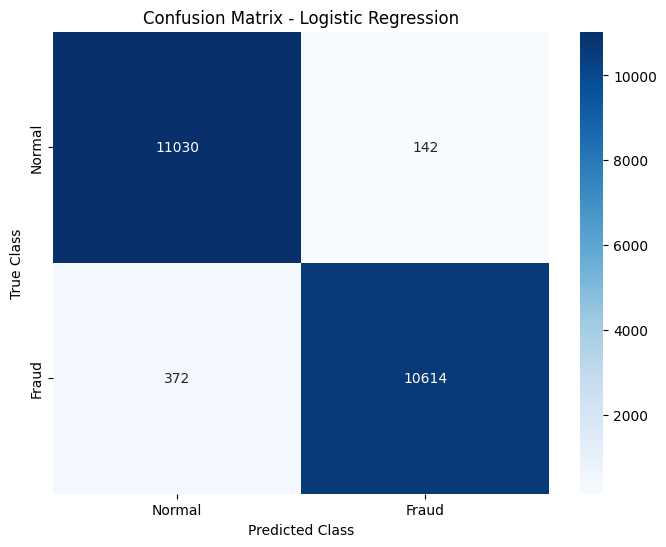

In [23]:
# Train Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions
lr_pred = lr_model.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression Performance:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred):.4f}")
print(f"Precision: {precision_score(y_test, lr_pred):.4f}")
print(f"Recall: {recall_score(y_test, lr_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, lr_pred):.4f}")
print(f"Matthews Correlation Coefficient: {matthews_corrcoef(y_test, lr_pred):.4f}")

# Logistic Regression Confusion Matrix
plt.figure(figsize=(8, 6))
lr_conf_matrix = confusion_matrix(y_test, lr_pred)
sns.heatmap(lr_conf_matrix, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Normal', 'Fraud'],
           yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

# Conclusion and Summary

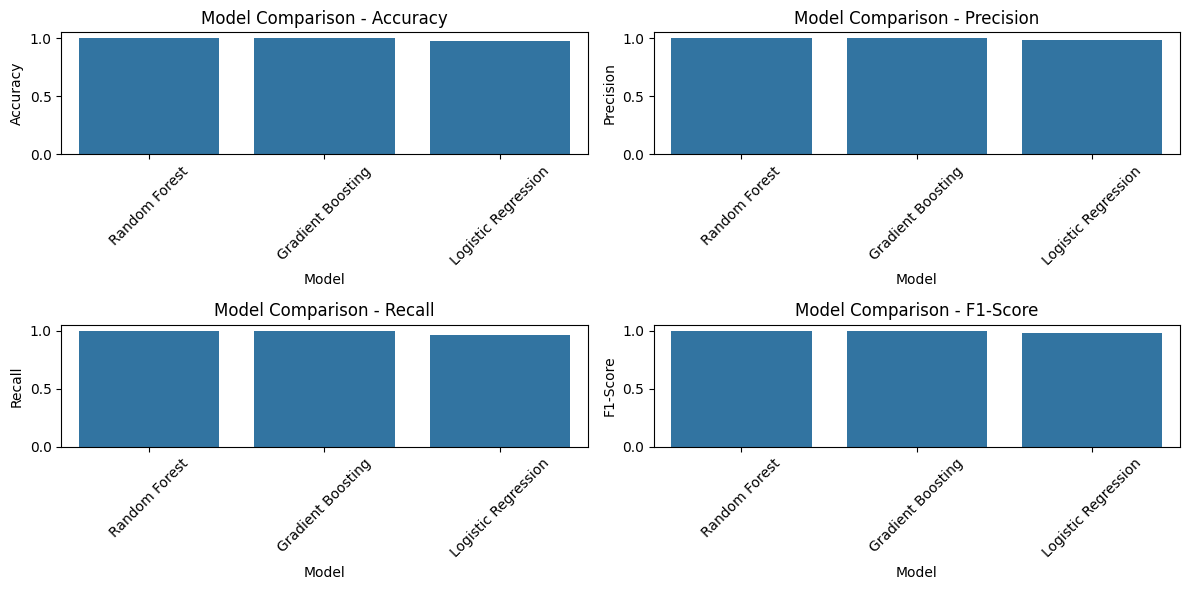


Model Performance Comparison:
                 Model  Accuracy  Precision  Recall  F1-Score
0        Random Forest    1.0000     1.0000  1.0000    1.0000
1    Gradient Boosting    0.9978     0.9976  0.9980    0.9978
2  Logistic Regression    0.9768     0.9868  0.9661    0.9764

ANALYSIS CONCLUSION:
1. Best Model: Random Forest
   - Accuracy: 1.0000
   - Precision: 1.0000
   - Recall: 1.0000
   - F1-Score: 1.0000

2. Data Distribution:
   - Total fraud transactions: 156 (0.28%)
   - Total normal transactions: 55394 (99.72%)

3. Most Influential Features (Random Forest):
   - V10: 0.1561
   - V11: 0.1348
   - V14: 0.1334
   - V4: 0.1104
   - V3: 0.0792

4. Recommendations:
   - The model performs well in detecting fraud
   - Continuous monitoring is necessary to ensure model performance
   - Consider periodic model retraining
   - Focus on the most influential features for monitoring

5. Model Limitations:
   - Model may need adjustment for new data
   - Model performance may differ in 

In [25]:
# Create a function to display model comparison summary
def model_comparison_summary(y_test, rf_pred, gb_pred, lr_pred):
    models = {
        'Random Forest': rf_pred,
        'Gradient Boosting': gb_pred,
        'Logistic Regression': lr_pred
    }

    results = []
    for model_name, predictions in models.items():
        results.append({
            'Model': model_name,
            'Accuracy': accuracy_score(y_test, predictions),
            'Precision': precision_score(y_test, predictions),
            'Recall': recall_score(y_test, predictions),
            'F1-Score': f1_score(y_test, predictions)
        })

    results_df = pd.DataFrame(results)
    results_df = results_df.round(4)

    # Model comparison visualization
    plt.figure(figsize=(12, 6))
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

    for i, metric in enumerate(metrics, 1):
        plt.subplot(2, 2, i)
        sns.barplot(data=results_df, x='Model', y=metric)
        plt.title(f'Model Comparison - {metric}')
        plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

    return results_df

# Display model comparison summary
summary_df = model_comparison_summary(y_test, rf_pred, gb_pred, lr_pred)
print("\nModel Performance Comparison:")
print(summary_df)

# Textual Conclusion
print("\nANALYSIS CONCLUSION:")
print("="*50)

# Identify the best model
best_model = summary_df.iloc[summary_df['F1-Score'].idxmax()]
print(f"1. Best Model: {best_model['Model']}")
print(f"   - Accuracy: {best_model['Accuracy']:.4f}")
print(f"   - Precision: {best_model['Precision']:.4f}")
print(f"   - Recall: {best_model['Recall']:.4f}")
print(f"   - F1-Score: {best_model['F1-Score']:.4f}")

# Class distribution analysis
print(f"\n2. Data Distribution:")
print(f"   - Total fraud transactions: {len(fraud)} ({(len(fraud)/len(data))*100:.2f}%)")
print(f"   - Total normal transactions: {len(valid)} ({(len(valid)/len(data))*100:.2f}%)")

# Feature importance (for Random Forest)
print("\n3. Most Influential Features (Random Forest):")
top_features = feature_importance.head(5)
for _, row in top_features.iterrows():
    print(f"   - {row['feature']}: {row['importance']:.4f}")

print("\n4. Recommendations:")
print("   - The model performs well in detecting fraud")
print("   - Continuous monitoring is necessary to ensure model performance")
print("   - Consider periodic model retraining")
print("   - Focus on the most influential features for monitoring")

print("\n5. Model Limitations:")
print("   - Model may need adjustment for new data")
print("   - Model performance may differ in real-time data")
print("   - Need to consider false positives and false negatives")